In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

Text(0, 0.5, 'proba')

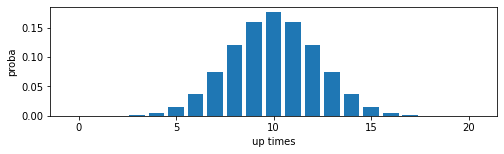

In [18]:
x = np.arange(0, 21)
y = scipy.stats.binom.pmf(x, 20, 0.5)
plt.figure(figsize=(8, 2))
plt.bar(x, y)
plt.xlabel('up times')
plt.ylabel('proba')

### 对比两途经依然度

In [20]:
# 两个途经的持续使用人数，不再使用胜数，总和为吸纳人数
a = [40, 165]
b = [62, 228]

In [21]:
x = np.linspace(0, 1, 200)

In [23]:
# A途经
n = sum(a)
p = a[0] / n
std = np.sqrt(p * (1 - p) / n)
y_a = scipy.stats.norm.pdf(x, p, std)

In [24]:
# B途经
n = sum(b)
p = b[0] / n
std = np.sqrt(p * (1 - p) / n)
y_b = scipy.stats.norm.pdf(x, p, std)

Text(0, 0.5, 'likely')

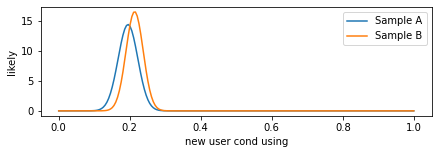

In [26]:
plt.figure(figsize=(7, 2))
plt.plot(x, y_a, label='Sample A')
plt.plot(x, y_b, label='Sample B')
plt.legend(loc='best')
plt.xlabel('new user cond using')
plt.ylabel('likely')

In [27]:
# 卡方检验
i, p_value, j, k = scipy.stats.chi2_contingency([a, b])

In [28]:
p_value

0.694254736449269

In [29]:
i

0.15451791002162868

In [30]:
j

1

In [31]:
k

array([[ 42.24242424, 162.75757576],
       [ 59.75757576, 230.24242424]])

### 显著性差异与业务效果

In [37]:
max_sample = 3000000
# sample a mean 45.1%
a = scipy.stats.bernoulli.rvs(0.451, size=max_sample)
# sample b mean 45.2%
b = scipy.stats.bernoulli.rvs(0.452, size=max_sample)

In [40]:
p_values = []
# 每次增加5000样本，进行检验
sample_sizes = np.arange(1000, max_sample, 5000)
for sample_size in sample_sizes:
    _, p_value = scipy.stats.ttest_ind(a[:sample_size],
                                       b[:sample_size],
                                       equal_var=False)
    p_values.append(p_value)

Text(0, 0.5, 'p value')

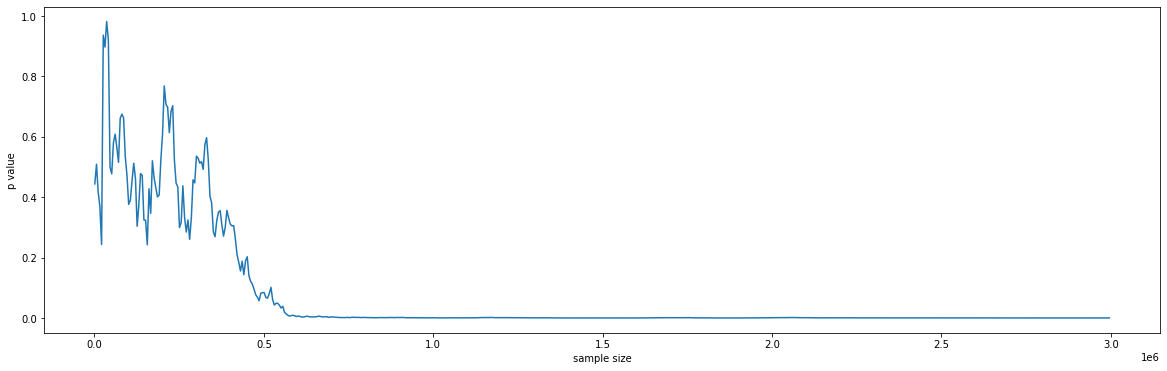

In [41]:
plt.figure(figsize=(20, 6))
plt.plot(sample_sizes, p_values)
plt.xlabel('sample size')
plt.ylabel('p value')